<a href="https://colab.research.google.com/github/CodeTunisia/Python-IPEIEM/blob/main/jour2/optique/optique.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Un aperçu sur l'utilisation de Python pour simuler des expériences de physique
**Ahmed Ammar** (email: `ahmed.ammar@fst.utm.tn`), Institut Préparatoire aux Études Scientifiques et Techniques, Université de Carthage.

Date: **17 mars 2020**

Copyright 2021, Ahmed Ammar. Released under CC Attribution 4.0 license

## Exemple de simulation numérique: l'expérience des fentes de Young 

### Réalisation de l'expèrience

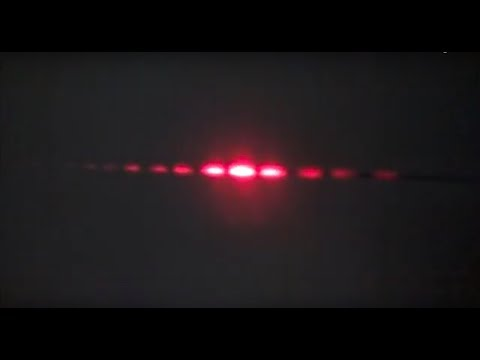

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('nuaHY5lj2AA', start=79, width=600, height=300)

### Observation

* Énumérer les franges d'interférence à l'intérieur de la tache centrale de diffraction.
* Mesurer la taille de la tache centrale de diffraction $\Delta S$ et la taille d'une frange d'interférence $\Delta s$.

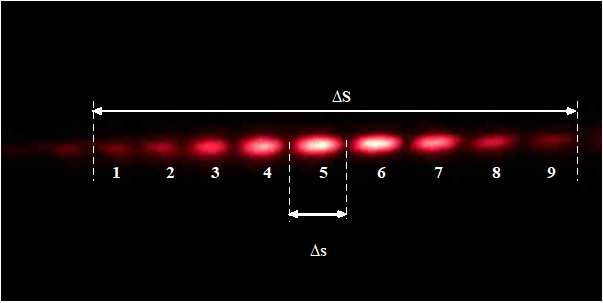

Que remarquez-vous lorsque vous modifiez la largeur et la distance entre les fentes?


### Modélisation numérique
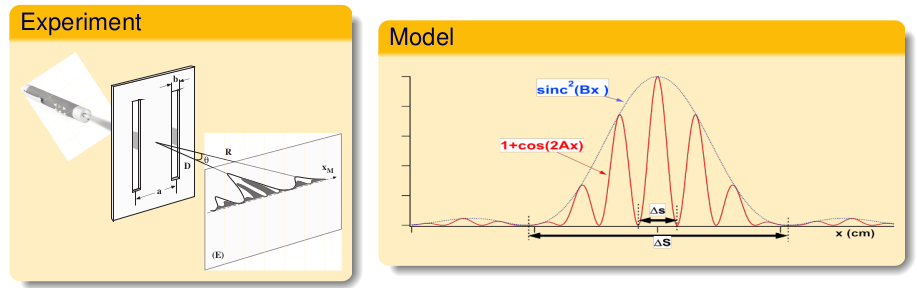

#### Expression analytique

\begin{equation}
	I(x) = sinc^2 (Bx)[1+cos(2Ax)] \quad avec: \ A = \pi a /\lambda D \ et \ B = \pi b / \lambda D
\end{equation}

$ b $ représente la largeur des fentes, $ a $ représente la distance entre les fentes, $ D $ est la distance de l'écran au plan des fentes et $ \lambda $ est la longueur d'onde de la lumière incidente monochromatique.

Les valeurs de $ \Delta S $ et $ \Delta s $ sont déterminées théoriquement à partir de $ b $ et $ a $:
\begin{equation}
\Delta S=2\lambda D/b	\quad et \quad \Delta s=\lambda D/a
\end{equation}

### Simulation numérique avec Python

## Exercice 1
Pour x un poit sur un écran (**E**) de largeur $L$ égale à 30 cm, calculer et tracer le profil d'intensité $I(x)$ et claculer les largeurs de la tache centrale de diffraction et de l'interfrange.

Compléter la fonction `Young(a, b, D)` par ce qui convient.

In [ ]:
# %load soultions/Young1D.py
import numpy as np
import matplotlib.pyplot as plt

def Young(a, b, D):
    Lambda = 632e-9
    L = 30e-2   # Largeur de l'ecran (m)
    x = np.linspace(-L/2, L/2, 200)   
    # Variables intermidières:
    A = (np.pi*a*1e-3)/(Lambda*D)
    B = (np.pi*b*1e-3)/(Lambda*D)
    T1 = (np.sin(B*x)/(B*x))**2   # Terme de diffraction
    T2 = 1 + np.cos(2*A*x)        # Terme d'interférence
    I = T1 * T2
    plt.figure(figsize = (7, 4))
    plt.plot(x*1e2, I/max(I), '-r',lw =2, label = "Interférence")
    plt.plot(x*1e2, T1, '--k',lw =2, label = "Diffraction")
    plt.xlabel("x [cm]")
    plt.ylabel("I/I0")
    plt.legend()
    # Tache centrale
    DS = (2*Lambda*D)/(b*1e-3)
    Ds = (Lambda*D)/(a*1e-3)
    print(" Largeur de la tache centrale = {:.2f} cm".format(DS*1e2))
    print(" Largeur  de l'interfrange = {:.2f} cm".format(Ds*1e2))
    

Pour des valeurs fixes de b = 0,15 mm et D = 10 m, utiliser la fonction ci-dessus pour rendre une figure d'interférance pour a$\in\{0.25; 0.5; 0.75; 1\}$ mm.

* **Pour a = 0.25 mm**

 Largeur de la tache centrale = 8.43 cm
 Largeur  de l'interfrange = 2.53 cm


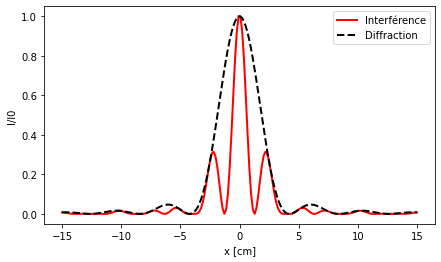

In [ ]:
Young(0.25, 0.15, 10)

* **Pour a = 0.5 mm**

 Largeur de la tache centrale = 8.43 cm
 Largeur  de l'interfrange = 1.26 cm


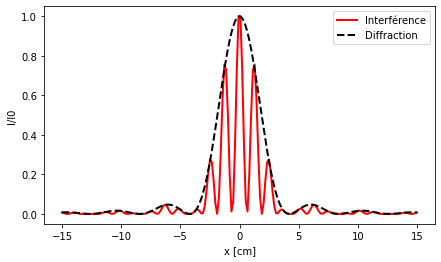

In [ ]:
Young(0.5, 0.15, 10)

* **Pour a = 0.75 mm**

 Largeur de la tache centrale = 8.43 cm
 Largeur  de l'interfrange = 0.84 cm


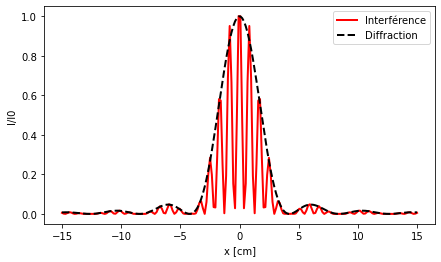

In [ ]:
Young(0.75, 0.15, 10)

* **Pour a = 1 mm**

 Largeur de la tache centrale = 8.43 cm
 Largeur  de l'interfrange = 0.63 cm


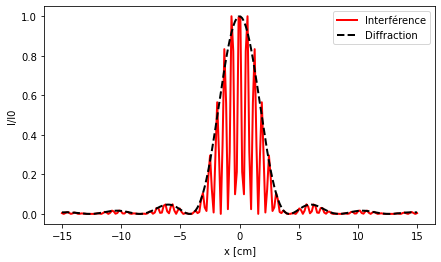

In [ ]:
Young(1, 0.15, 10)

### Ajout de l'interactivité pour notre simulation (IPython Widgets)

In [ ]:
from ipywidgets import interactive, FloatSlider
from IPython.display import display
w = interactive(Young, 
              a = FloatSlider(min = 0.1, max = 1.2,
                              value = 0.25,  step=0.01,
                              description= "a [mm]"),
              b = FloatSlider(min = 0.1, max = 1,
                              value = 0.15,  step=0.01,
                              description= "b [mm]"),
              D = FloatSlider(min = 1,max = 20,
                              step = 0.1, value = 15,
                              description= "D [m]"))
display(w)

interactive(children=(FloatSlider(value=0.25, description='a [mm]', max=1.2, min=0.1, step=0.01), FloatSlider(…

## Simulation à deux dimention: I(x, y)

Mêmes qustions pour une figure d'interférence en 2D.

In [ ]:
# %load soultions/Young2D.py
def Young2D(a, b, D):
    Lambda = 630e-9 
    L = 30e-2   # Largeur de l'ecran
    x = np.linspace(-L/2, L/2, 200) 
    y = x
    X,Y = np.meshgrid(x,y)  
    # Variables intermidières:
    A = (np.pi*a*1e-3)/(Lambda*D); B = (np.pi*b*1e-3)/(Lambda*D)
    T1 = (np.sin(B*X)/(B*X))**2   # Terme de diffraction
    T2 = 1 + np.cos(2*A*X)        # Terme d'interférence
    I = T1 * T2
    plt.figure(figsize=(5, 5))
    plt.imshow(I, cmap="gray", vmax = 0.05*np.max(I))
    plt.colorbar(shrink = 0.8, aspect = 8)

* **Pour a = 0.25 mm**

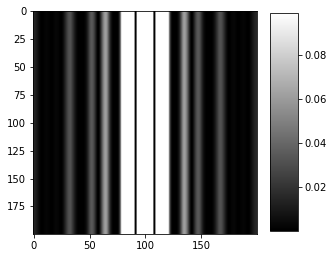

In [ ]:
Young2D(0.25, 0.15, 10)

* **Pour a = 0.75 mm**

### Ajout de l'interactivité pour notre simulation (IPython Widgets)

In [ ]:
w2=interactive(Young2D,
               a = FloatSlider(min = 0.1, max = 1.2, value = 0.25,  step=0.01, description= "a [mm]"),
               b = FloatSlider(min = 0.1, max = 1, value = 0.15,  step=0.01, description= "b [mm]"),
               D = FloatSlider(min = 1,max = 20,step = 0.1, value = 15, description= "D [m]"))
display(w2)

interactive(children=(FloatSlider(value=0.25, description='a [mm]', max=1.2, min=0.1, step=0.01), FloatSlider(…

## Exercice 2 : Diffraction par ouverture rectangulaire (2D)

Considérons un faisceau de lumière monochromatique de longueur d'onde $\lambda$ éclairant une ouverture rectangulaire située dans un plan $(xOy)$. La largeur de l'ouverture $b$ est dans la direction $x$ et sa hauteur $h$ est dans la direction $y$.

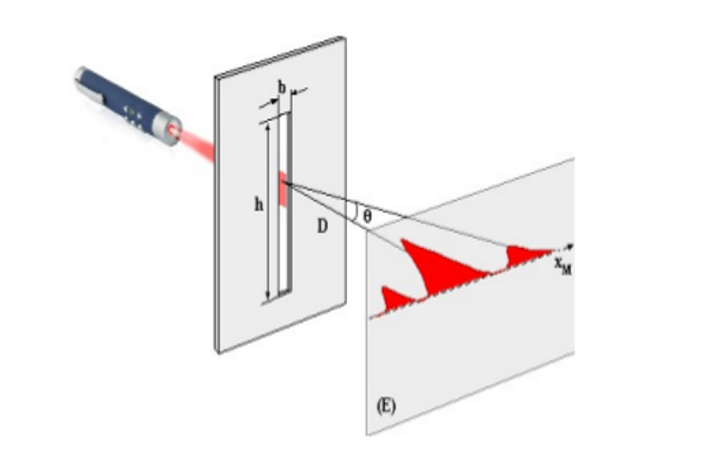


L'intensité normalisée de lumière en un point $M$ situé sur un écran ($E$) et à une distance $D$ de la fente peut s'écrire comme suit :
$$
\dfrac{I(x_{M}, y_{M})}{I_{0}} = \text{sinc}^{2}\left (B \cdot x_{M} \right)\,\text{sinc}^{2}  \left ( H \cdot y_{M} \right )
$$

où $H = \frac{\pi h}{\lambda D}$, $B = \frac{\pi b}{\lambda D}$.


* La largeur de la tache centrale dans la direction $x$ est inversement proportionnelle à la largeur de l'ouverture: $\Delta x = \frac{2 \lambda D}{b}$;
* La largeur de la tache centrale dans la direction $y$ est inversement proportionnelle à la hauteur de l'ouverture : $\Delta y = \frac{2 \lambda D}{h}$.


Écrire la fonction Python `DiffRect2D(b, h, D)` qui calcul $\Delta x$ et $\Delta y$ et affiche la figure de diffraction :
```python
In[1]: DiffRect(b= 2*1.E-5, h= 4*1.E-5, D= 2)
La largeur de la tache centrale dans la direction x :  12.6
La largeur de la tache centrale dans la direction y :  6.3
```

In [ ]:
# %load soultions/DiffRect.py
import numpy as np
import matplotlib.pyplot as plt
def DiffRect(b, h, D):
    lamda= 630*1.E-9
    k = (2*np.pi)/lamda  # wavelength of light in vaccuum
    a = 30 * 1.E-2  # Side of a square-shaped screen (m)
    # The width of the central maximum along (Ox)
    delta_x = 1.E2 * (2 * lamda * D) / b
    print("Largeur de la tache centrale suivant les x : ", delta_x)
    # The width of the central maximum along (Oy)
    delta_y = 1.E2 * (2 * lamda * D) / h
    print("Largeur de la tache centrale suivant les y : ", delta_y)
    N = 400
    X = np.linspace(-a/2, a/2, N)
    Y = X  # coordinates of screen
    B = (k * b * X) / (2. * D)
    H = (k * h * Y) / (2. * D)  # intermediate variable
    # 2D & 3 D representation
    BB, HH = np.meshgrid(B, H)
    I = ((np.sin(BB) / BB)**2) * ((np.sin(HH) / HH)**2)
    # figure 2D
    plt.imshow(I, cmap='gray', interpolation='bilinear',
                origin='lower', vmin=0, vmax=.003)
    plt.xlabel('$X$', fontsize=12, fontweight='bold')
    plt.ylabel('$Y$', fontsize=12, fontweight='bold')
    plt.title('Diffraction de Fraunhofer par ouverture rectangulaire')

![](https://github.com/CodeTunisia/Python-IPEIEM/blob/main/jour2/optique/images/formule1.png?raw=1)

Largeur de la tache centrale suivant les x :  12.6
Largeur de la tache centrale suivant les y :  12.6


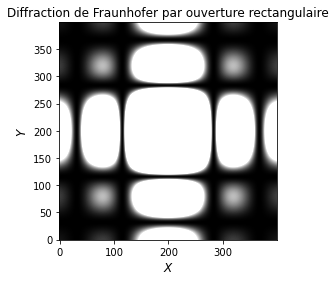

In [ ]:
DiffRect(b= 2*1.E-5, h= 2*1.E-5, D= 2)

In [ ]:
w2=interactive(DiffRect,
               b = FloatSlider(min = 0.1*1.E-5, max = 40*1.E-5, value = 20*1.E-5,  step=1.E-5, description= "a [mm]"),
               h = FloatSlider(min = 0.1*1.E-5, max = 40*1.E-5, value = 20*1.E-5,  step=1.E-5, description= "h [mm]"),
               D = FloatSlider(min = 1,max = 20,step = 0.1, value = 15, description= "D [m]"))
display(w2)

interactive(children=(FloatSlider(value=0.0002, description='a [mm]', max=0.0004, min=1.0000000000000002e-06, …